**Approach:**

1) Import necessary libraries

2) read an image

3) convert to HSV

4) threshold

5) blur

6) remove extra or any unwanted area

7) draw contours over original image

8) use watershed to detect touching contours

9) take avg of watershed and contours detection to give satisfactory results. 

# Importing all the necessary libraries

In [1]:
from __future__ import print_function
import os
import cv2
from skimage.segmentation import watershed
from skimage.feature import peak_local_max
from scipy import ndimage
import numpy as np
from matplotlib import pyplot as plt

# Reading Image or asking user for image as input in jpg or png format

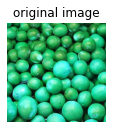

In [2]:
image = cv2.imread('/content/lemon1.jpg')
plt.subplot(221)
plt.title('original image')
plt.imshow(image); plt.axis('off');

## Preprocessing the image
Steps include :

1) HSV split. (hue, saturation, value). This is the colour model which human eyes perceive. 

Note:- One can also convert to Grayscale Image

2) Thresholding technique is used to convert the image to a binary image (i.e. with only 2 pixel values either 0 or 255 etc) with respect to a chosen threshold pixel intensity.

3) Blurring technique is used in the image to remove noise or any unnecessary spots in the image. italicized text

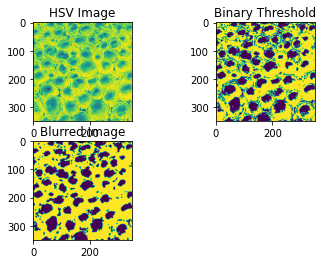

In [3]:
hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
plt.subplot(221)
plt.title('HSV Image')
plt.imshow(hsv)

h, s, v = cv2.split(hsv)
plt.imshow(s)
# Thresholding technique is used to convert the image to a binary image
_, thresh = cv2.threshold(s, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
plt.subplot(222)
plt.title('Binary Threshold')
plt.imshow(thresh)

# Blurring technique 
blur = cv2.medianBlur(thresh, 5)
plt.subplot(223)
plt.title("Blurred Image")
plt.imshow(blur)

# Contour detection: using contour to detect the lemons in “blurred” image, in a confined area.


In [4]:
contours, hierarchy = cv2.findContours(blur,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
count = []
for x in contours:
  area = cv2.contourArea(x)
# To remove small and insignificant contours arbitrarily and hence a hyper-parameter. 
  if area > 500 :  # hyper-parameter = 500
    count.append(x)

#  Watershed algorithm 
The watershed is a classical algorithm used for segmentation, that is, for separating different objects in an image. 
Taking help from the user-defined markers, the watershed algorithm treats pixels values as a local elevation.

In [5]:
## Watershed algorithm to separate out lemons which touch each other (if any); Segmentation

# Now we want to separate the two objects in image
# Generate the markers as local maxima of the distance to the background
distance = ndimage.distance_transform_edt(thresh)
localMax = peak_local_max(distance, indices=False, min_distance=40, labels=thresh)
markers = ndimage.label(localMax, structure=np.ones((3, 3)))[0]
labels = watershed(-distance, markers, mask=thresh)
ws = len(np.unique(labels)) -1


# For Counting => average of 2 methods and print the results.

In [6]:
cnt = int((ws + len(count)) / 2)
print("number of object detected = ", cnt)
cv2.drawContours(image, count, -1, (255,0,0), 3)

plt.show()

number of object detected =  19


# Conclusion
***Lesser the area defined better is the detection of the objects in the image.***